# MULTIPLE LAYER PERCEPTRON FOR CANCER CLASSIFICATION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# example making new class predictions for a classification problem
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [4]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [5]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### We are using only two columns out of these that is radius and texture

In [6]:
X = df_cancer.iloc[:,[0,1]]
X.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [7]:
y = df_cancer['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

## Train-test split first!

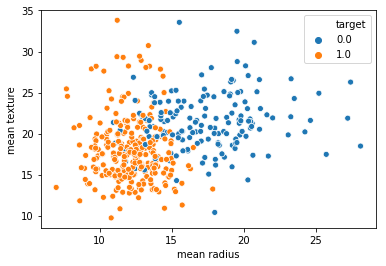

In [8]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sns.scatterplot(x = X_train['mean radius'], y = X_train['mean texture'], hue = y_train)

## scale the data

In [9]:
scalar = MinMaxScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)


scalar = MinMaxScaler()
scalar.fit(X_test)
X_test_scaled = scalar.transform(X_test)


### visualize the data

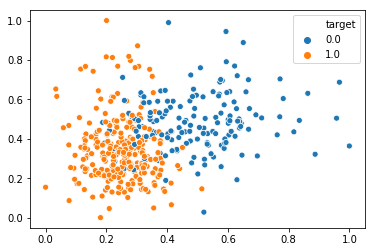

In [10]:
sns.scatterplot(X_train_scaled[:,0], X_train_scaled[:,1], hue=y_train)

## make a model to train

In [11]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
#model.add(Dense(4, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
%time model.fit(X_train_scaled, y_train, epochs=500, verbose=2)

Epoch 1/500
 - 20s - loss: 0.6910
Epoch 2/500
 - 0s - loss: 0.6880
Epoch 3/500
 - 0s - loss: 0.6850
Epoch 4/500
 - 0s - loss: 0.6822
Epoch 5/500
 - 0s - loss: 0.6796
Epoch 6/500
 - 0s - loss: 0.6771
Epoch 7/500
 - 0s - loss: 0.6745
Epoch 8/500
 - 0s - loss: 0.6722
Epoch 9/500
 - 0s - loss: 0.6701
Epoch 10/500
 - 0s - loss: 0.6680
Epoch 11/500
 - 0s - loss: 0.6660
Epoch 12/500
 - 0s - loss: 0.6641
Epoch 13/500
 - 0s - loss: 0.6624
Epoch 14/500
 - 0s - loss: 0.6607
Epoch 15/500
 - 0s - loss: 0.6590
Epoch 16/500
 - 0s - loss: 0.6575
Epoch 17/500
 - 0s - loss: 0.6558
Epoch 18/500
 - 0s - loss: 0.6543
Epoch 19/500
 - 0s - loss: 0.6529
Epoch 20/500
 - 0s - loss: 0.6514
Epoch 21/500
 - 0s - loss: 0.6502
Epoch 22/500
 - 0s - loss: 0.6488
Epoch 23/500
 - 0s - loss: 0.6475
Epoch 24/500
 - 0s - loss: 0.6463
Epoch 25/500
 - 0s - loss: 0.6449
Epoch 26/500
 - 0s - loss: 0.6439
Epoch 27/500
 - 0s - loss: 0.6428
Epoch 28/500
 - 0s - loss: 0.6417
Epoch 29/500
 - 0s - loss: 0.6406
Epoch 30/500
 - 0s - l

 - 0s - loss: 0.5081
Epoch 239/500
 - 0s - loss: 0.5077
Epoch 240/500
 - 0s - loss: 0.5072
Epoch 241/500
 - 0s - loss: 0.5067
Epoch 242/500
 - 0s - loss: 0.5063
Epoch 243/500
 - 0s - loss: 0.5058
Epoch 244/500
 - 0s - loss: 0.5053
Epoch 245/500
 - 0s - loss: 0.5049
Epoch 246/500
 - 0s - loss: 0.5044
Epoch 247/500
 - 0s - loss: 0.5039
Epoch 248/500
 - 0s - loss: 0.5035
Epoch 249/500
 - 0s - loss: 0.5030
Epoch 250/500
 - 0s - loss: 0.5026
Epoch 251/500
 - 0s - loss: 0.5021
Epoch 252/500
 - 0s - loss: 0.5017
Epoch 253/500
 - 0s - loss: 0.5012
Epoch 254/500
 - 0s - loss: 0.5008
Epoch 255/500
 - 0s - loss: 0.5003
Epoch 256/500
 - 0s - loss: 0.4998
Epoch 257/500
 - 0s - loss: 0.4994
Epoch 258/500
 - 0s - loss: 0.4989
Epoch 259/500
 - 0s - loss: 0.4985
Epoch 260/500
 - 0s - loss: 0.4980
Epoch 261/500
 - 0s - loss: 0.4976
Epoch 262/500
 - 0s - loss: 0.4971
Epoch 263/500
 - 0s - loss: 0.4967
Epoch 264/500
 - 0s - loss: 0.4963
Epoch 265/500
 - 0s - loss: 0.4958
Epoch 266/500
 - 0s - loss: 0.4954

Epoch 473/500
 - 0s - loss: 0.4234
Epoch 474/500
 - 0s - loss: 0.4231
Epoch 475/500
 - 0s - loss: 0.4229
Epoch 476/500
 - 0s - loss: 0.4225
Epoch 477/500
 - 0s - loss: 0.4223
Epoch 478/500
 - 0s - loss: 0.4220
Epoch 479/500
 - 0s - loss: 0.4218
Epoch 480/500
 - 0s - loss: 0.4215
Epoch 481/500
 - 0s - loss: 0.4213
Epoch 482/500
 - 0s - loss: 0.4210
Epoch 483/500
 - 0s - loss: 0.4207
Epoch 484/500
 - 0s - loss: 0.4205
Epoch 485/500
 - 0s - loss: 0.4202
Epoch 486/500
 - 0s - loss: 0.4199
Epoch 487/500
 - 0s - loss: 0.4197
Epoch 488/500
 - 0s - loss: 0.4194
Epoch 489/500
 - 0s - loss: 0.4191
Epoch 490/500
 - 0s - loss: 0.4189
Epoch 491/500
 - 0s - loss: 0.4186
Epoch 492/500
 - 0s - loss: 0.4184
Epoch 493/500
 - 0s - loss: 0.4181
Epoch 494/500
 - 0s - loss: 0.4179
Epoch 495/500
 - 0s - loss: 0.4176
Epoch 496/500
 - 0s - loss: 0.4174
Epoch 497/500
 - 0s - loss: 0.4171
Epoch 498/500
 - 0s - loss: 0.4169
Epoch 499/500
 - 0s - loss: 0.4166
Epoch 500/500
 - 0s - loss: 0.4163
CPU times: user 33.6

# MORE NEURONS!

In [12]:
# define and fit the final model
model = Sequential()
model.add(Dense(20, input_dim=2, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
%time model.fit(X_train_scaled, y_train, epochs=500, verbose=2)

Epoch 1/500
 - 0s - loss: 0.6904
Epoch 2/500
 - 0s - loss: 0.6798
Epoch 3/500
 - 0s - loss: 0.6665
Epoch 4/500
 - 0s - loss: 0.6543
Epoch 5/500
 - 0s - loss: 0.6420
Epoch 6/500
 - 0s - loss: 0.6300
Epoch 7/500
 - 0s - loss: 0.6179
Epoch 8/500
 - 0s - loss: 0.6034
Epoch 9/500
 - 0s - loss: 0.5882
Epoch 10/500
 - 0s - loss: 0.5713
Epoch 11/500
 - 0s - loss: 0.5518
Epoch 12/500
 - 0s - loss: 0.5316
Epoch 13/500
 - 0s - loss: 0.5101
Epoch 14/500
 - 0s - loss: 0.4898
Epoch 15/500
 - 0s - loss: 0.4644
Epoch 16/500
 - 0s - loss: 0.4417
Epoch 17/500
 - 0s - loss: 0.4241
Epoch 18/500
 - 0s - loss: 0.4001
Epoch 19/500
 - 0s - loss: 0.3828
Epoch 20/500
 - 0s - loss: 0.3654
Epoch 21/500
 - 0s - loss: 0.3534
Epoch 22/500
 - 0s - loss: 0.3381
Epoch 23/500
 - 0s - loss: 0.3279
Epoch 24/500
 - 0s - loss: 0.3176
Epoch 25/500
 - 0s - loss: 0.3109
Epoch 26/500
 - 0s - loss: 0.3014
Epoch 27/500
 - 0s - loss: 0.2945
Epoch 28/500
 - 0s - loss: 0.2891
Epoch 29/500
 - 0s - loss: 0.2847
Epoch 30/500
 - 0s - lo

 - 0s - loss: 0.2438
Epoch 239/500
 - 0s - loss: 0.2396
Epoch 240/500
 - 0s - loss: 0.2403
Epoch 241/500
 - 0s - loss: 0.2422
Epoch 242/500
 - 0s - loss: 0.2394
Epoch 243/500
 - 0s - loss: 0.2421
Epoch 244/500
 - 0s - loss: 0.2433
Epoch 245/500
 - 0s - loss: 0.2396
Epoch 246/500
 - 0s - loss: 0.2418
Epoch 247/500
 - 0s - loss: 0.2403
Epoch 248/500
 - 0s - loss: 0.2396
Epoch 249/500
 - 0s - loss: 0.2405
Epoch 250/500
 - 0s - loss: 0.2409
Epoch 251/500
 - 0s - loss: 0.2444
Epoch 252/500
 - 0s - loss: 0.2402
Epoch 253/500
 - 0s - loss: 0.2398
Epoch 254/500
 - 0s - loss: 0.2409
Epoch 255/500
 - 0s - loss: 0.2398
Epoch 256/500
 - 0s - loss: 0.2414
Epoch 257/500
 - 0s - loss: 0.2444
Epoch 258/500
 - 0s - loss: 0.2423
Epoch 259/500
 - 0s - loss: 0.2409
Epoch 260/500
 - 0s - loss: 0.2399
Epoch 261/500
 - 0s - loss: 0.2408
Epoch 262/500
 - 0s - loss: 0.2395
Epoch 263/500
 - 0s - loss: 0.2393
Epoch 264/500
 - 0s - loss: 0.2394
Epoch 265/500
 - 0s - loss: 0.2394
Epoch 266/500
 - 0s - loss: 0.2395

Epoch 473/500
 - 0s - loss: 0.2366
Epoch 474/500
 - 0s - loss: 0.2367
Epoch 475/500
 - 0s - loss: 0.2359
Epoch 476/500
 - 0s - loss: 0.2381
Epoch 477/500
 - 0s - loss: 0.2364
Epoch 478/500
 - 0s - loss: 0.2375
Epoch 479/500
 - 0s - loss: 0.2366
Epoch 480/500
 - 0s - loss: 0.2365
Epoch 481/500
 - 0s - loss: 0.2369
Epoch 482/500
 - 0s - loss: 0.2368
Epoch 483/500
 - 0s - loss: 0.2375
Epoch 484/500
 - 0s - loss: 0.2364
Epoch 485/500
 - 0s - loss: 0.2378
Epoch 486/500
 - 0s - loss: 0.2359
Epoch 487/500
 - 0s - loss: 0.2368
Epoch 488/500
 - 0s - loss: 0.2384
Epoch 489/500
 - 0s - loss: 0.2372
Epoch 490/500
 - 0s - loss: 0.2375
Epoch 491/500
 - 0s - loss: 0.2369
Epoch 492/500
 - 0s - loss: 0.2380
Epoch 493/500
 - 0s - loss: 0.2384
Epoch 494/500
 - 0s - loss: 0.2359
Epoch 495/500
 - 0s - loss: 0.2387
Epoch 496/500
 - 0s - loss: 0.2373
Epoch 497/500
 - 0s - loss: 0.2375
Epoch 498/500
 - 0s - loss: 0.2371
Epoch 499/500
 - 0s - loss: 0.2408
Epoch 500/500
 - 0s - loss: 0.2364
CPU times: user 38.4

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [14]:
# make a prediction
y_predict = model.predict_classes(X_test_scaled)

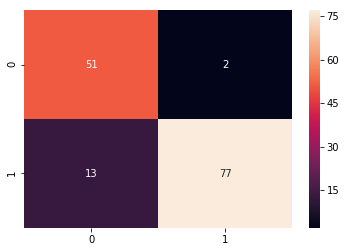

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")


#                       actual values true or false
#                                    TP  FP
# predicted true or false            FN  TN

In [17]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87        53
         1.0       0.97      0.86      0.91        90

   micro avg       0.90      0.90      0.90       143
   macro avg       0.89      0.91      0.89       143
weighted avg       0.91      0.90      0.90       143



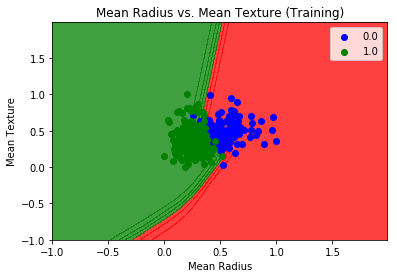

In [18]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train_scaled, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Training)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()

In [19]:
weights, biases = model.layers[0].get_weights()

In [20]:
weights

array([[ 0.7102112 , -0.34681314,  0.90186304, -0.02909613,  0.32996225,
         0.6328654 , -0.52091116,  0.651834  , -0.516461  ,  0.6141696 ,
        -0.00515431,  0.10086423, -0.43015265,  0.5100514 , -0.29071102,
         0.71974117, -0.5957865 , -0.3932336 ,  0.73169017, -0.36704904],
       [-0.15158272, -0.39627922,  0.44192436, -0.3065309 , -0.8695199 ,
         0.17162147,  0.31093457,  0.0427144 ,  0.2511814 ,  0.24743645,
         0.4093556 , -0.59766906,  0.25581115, -1.4614533 , -0.3621021 ,
        -0.14747453,  0.4222578 , -0.13037333,  0.17888291,  0.13883226]],
      dtype=float32)

In [21]:
biases

array([ 0.00894797,  0.        ,  0.11488121,  0.        ,  0.31687075,
        0.11583953,  0.19010071, -0.06813709,  0.26562297, -0.11193596,
        0.2133726 ,  0.2738633 ,  0.15721634, -0.05920719,  0.        ,
        0.39044717,  0.19969939,  0.        , -0.10751553,  0.1914187 ],
      dtype=float32)

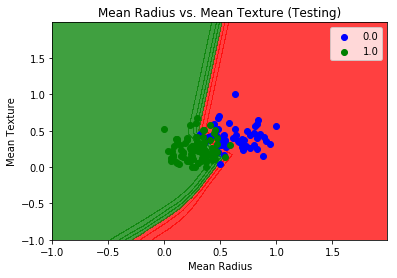

In [22]:
# Visualising the Testing set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_test_scaled, y_test
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('blue', 'green'))(i), label = j)
    
plt.title('Mean Radius vs. Mean Texture (Testing)')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.show()